In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import networkx as nx
import ast
import Influencer_Characteristics as ic
import File_Opening as fo

C:\Users\I6240624\AppData\Local\Temp\ipykernel_4948\113245677.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dfins_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv')
dfins_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv')
dftt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv')
dftt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv')
dfyt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en_disclosed_ad.csv')
dfyt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl_disclosed_ad.csv')

In [3]:
insinf_en = fo.get_unique_values(dfins_en, "username")
insinf_nl = fo.get_unique_values(dfins_nl, "username")
ttinf_en = fo.get_unique_values(dftt_en, "username")
ttinf_nl = fo.get_unique_values(dftt_nl, "username")
ytinf_en = fo.get_unique_values(dfyt_en, "channel_title")
ytinf_nl = fo.get_unique_values(dfyt_nl, "channel_title")

In [4]:
dfyt_en["video_id"].to_csv('dfyt_en_index_ad.csv', index=False)
dfyt_nl["video_id"].to_csv('dfyt_nl_index_ad.csv', index=False)
dftt_en["id"].to_csv('dftt_en_index_ad.csv', index=False)
dftt_nl["id"].to_csv('dftt_nl_index_ad.csv', index=False)
dfins_en["ct_id"].to_csv('dfins_en_index_ad.csv', index=False)
dfins_nl["ct_id"].to_csv('dfins_nl_index_ad.csv', index=False)

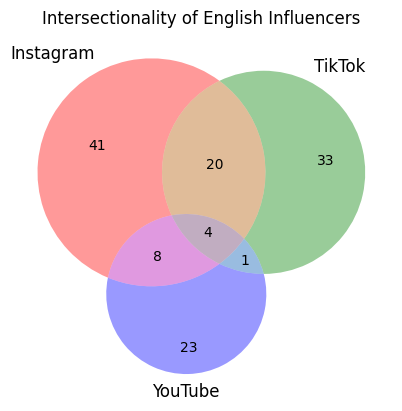

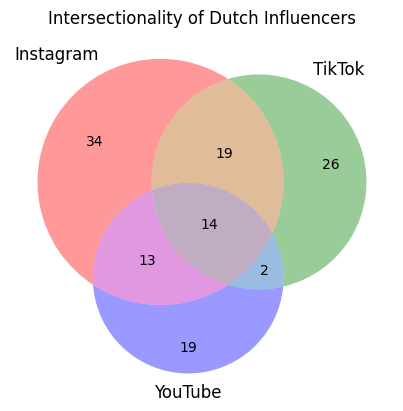

In [5]:
fo.find_common_elements_and_plot(insinf_en, ttinf_en, ytinf_en, "Instagram", "TikTok", "YouTube","Intersectionality of English Influencers")
fo.find_common_elements_and_plot(insinf_nl, ttinf_nl, ytinf_nl, "Instagram", "TikTok", "YouTube","Intersectionality of Dutch Influencers")

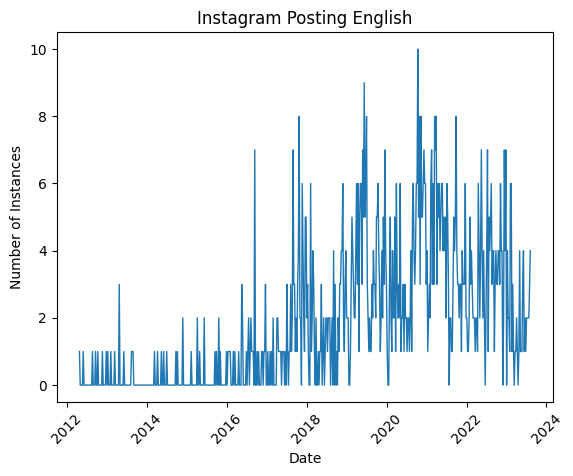

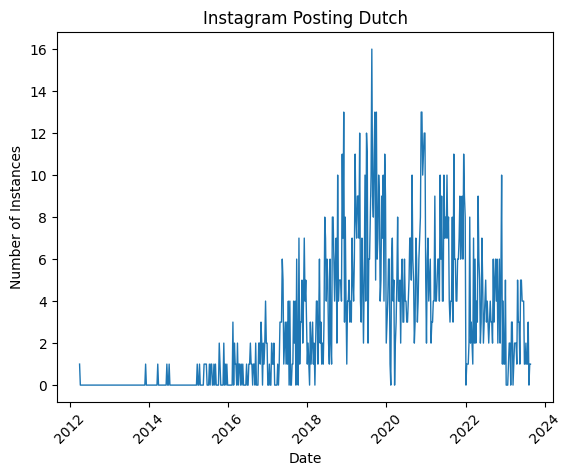

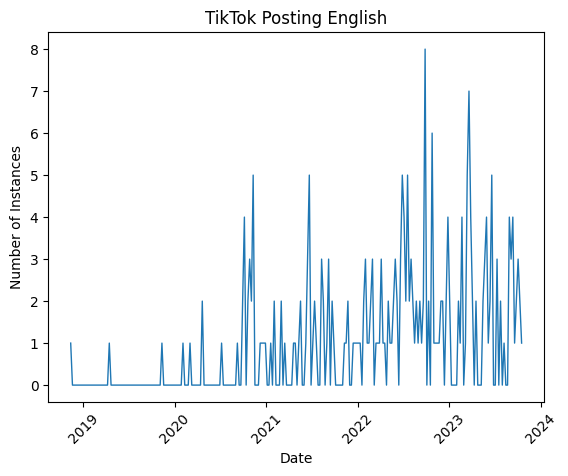

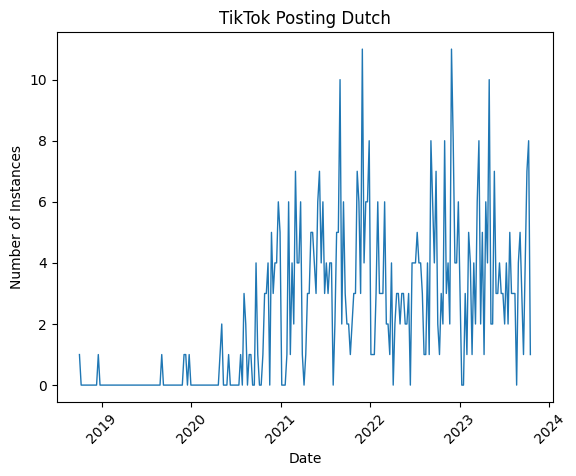

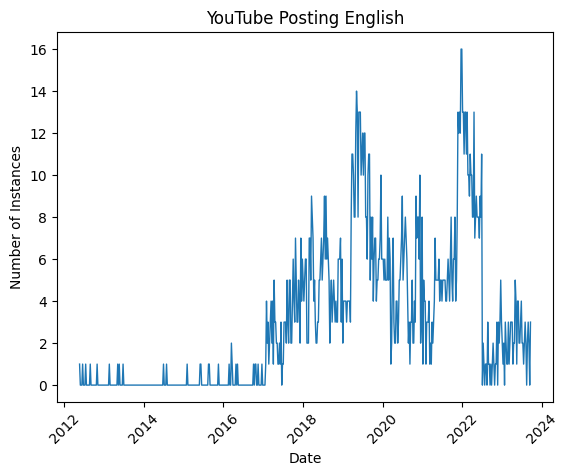

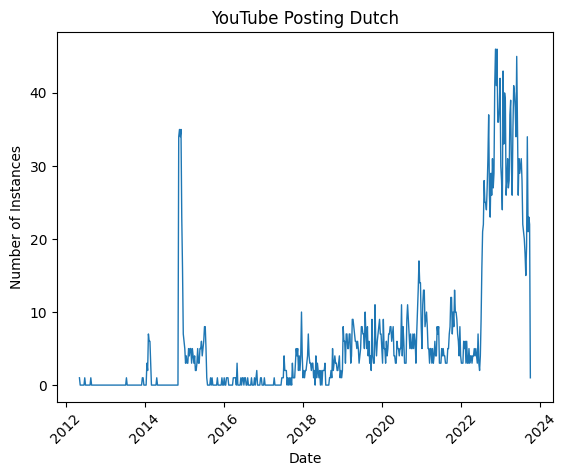

In [6]:
fo.plot_instances_by_week(dfins_en,"date", "Instagram Posting English")
fo.plot_instances_by_week(dfins_nl,"date", "Instagram Posting Dutch")
fo.plot_instances_by_week(dftt_en,"create_time", "TikTok Posting English")
fo.plot_instances_by_week(dftt_nl,"create_time", "TikTok Posting Dutch")
fo.plot_instances_by_week(dfyt_en,"published_at_video", "YouTube Posting English")
fo.plot_instances_by_week(dfyt_nl,"published_at_video", "YouTube Posting Dutch")

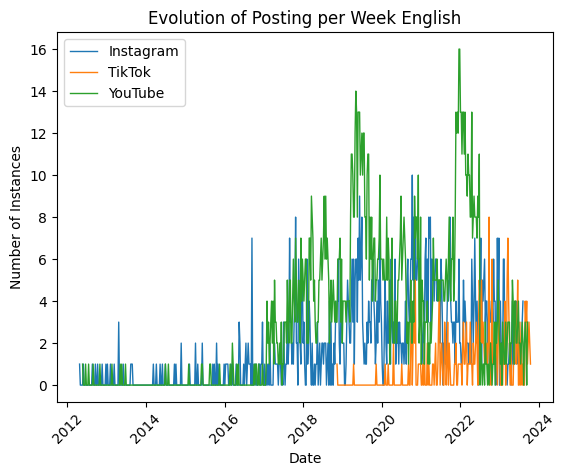

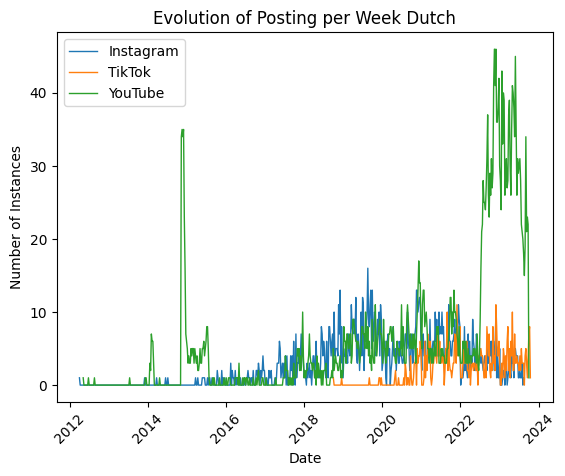

In [7]:
fo.plot_instances_together(dfins_en,dftt_en,dfyt_en,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week English")
fo.plot_instances_together(dfins_nl,dftt_nl,dfyt_nl,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week Dutch")

In [8]:
timediffins_en = fo.calculate_time_between_posts(dfins_en, "username", "date")
timediffins_nl = fo.calculate_time_between_posts(dfins_nl, "username", "date")
timedifftt_en = fo.calculate_time_between_posts(dftt_en, "username", "create_time")
timedifftt_nl = fo.calculate_time_between_posts(dftt_nl, "username", "create_time")
timediffyt_en = fo.calculate_time_between_posts(dfyt_en, "channel_title", "published_at_video")
timediffyt_nl = fo.calculate_time_between_posts(dfyt_nl, "channel_title", "published_at_video")

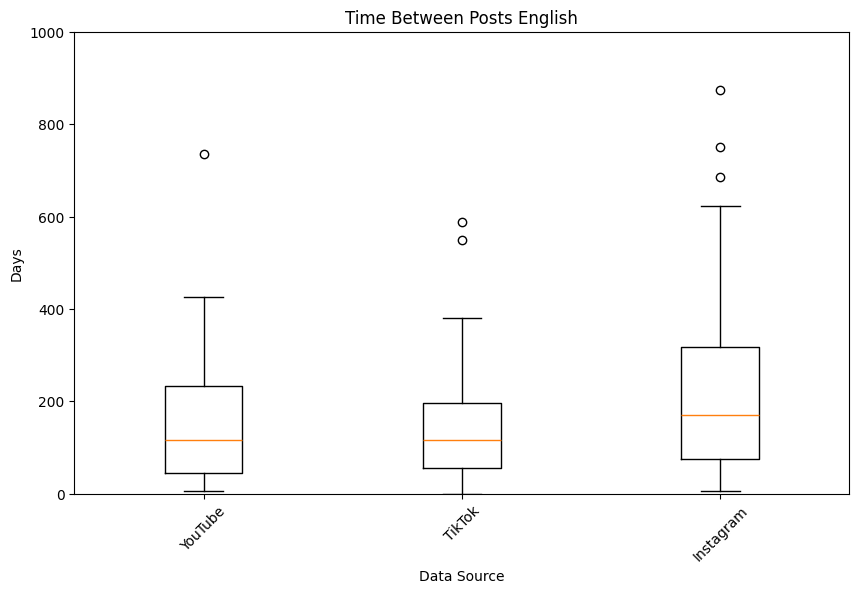

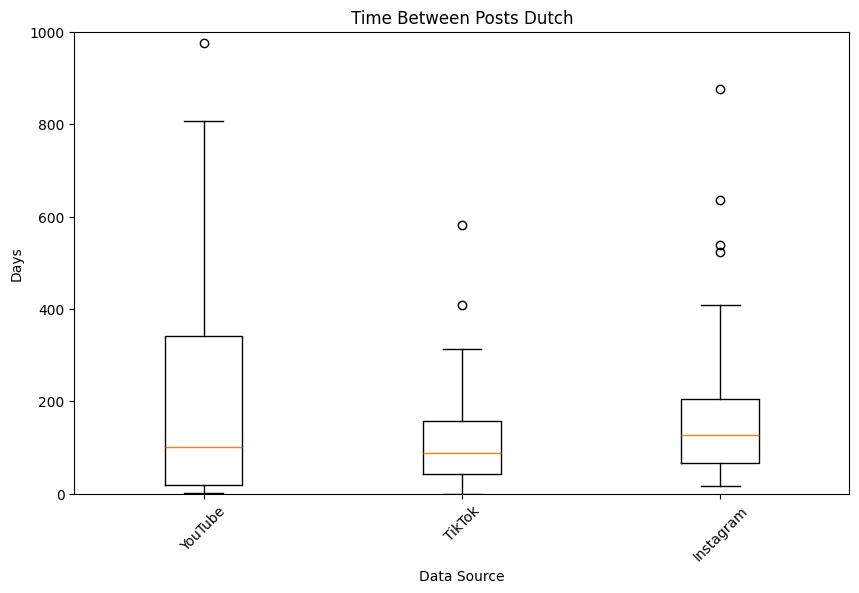

In [9]:
fo.plot_time_between_posts(timediffyt_en, timedifftt_en, timediffins_en, "YouTube", "TikTok", "Instagram", "Time Between Posts English")
fo.plot_time_between_posts(timediffyt_nl, timedifftt_nl, timediffins_nl, "YouTube", "TikTok", "Instagram", "Time Between Posts Dutch")

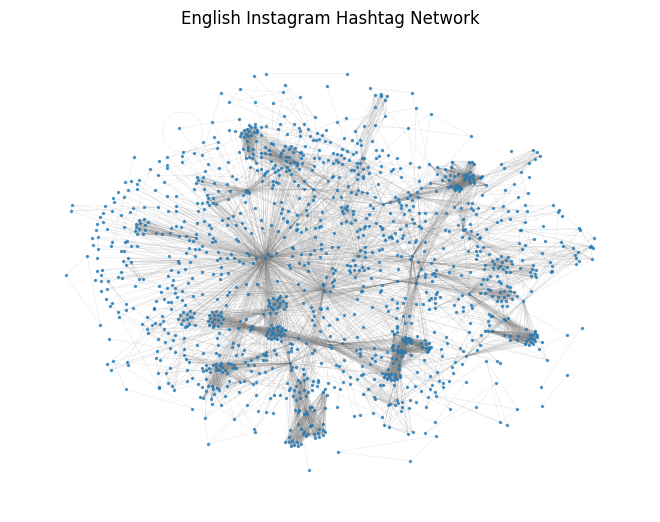

In [10]:
fo.draw_hashtag_network(dfins_en, "caption_hashtags", "English Instagram Hashtag Network")
fo.draw_hashtag_network(dfins_nl, "caption_hashtags", "Dutch Instagram Hashtag Network")
fo.draw_hashtag_network(dftt_en, "hashtag_names", "English TikTok Hashtag Network")
fo.draw_hashtag_network(dftt_nl, "hashtag_names", "Dutch TikTok Hashtag Network")
fo.draw_hashtag_network(dfyt_en, "tags", "English YouTube Hashtag Network", sample_size=200)
fo.draw_hashtag_network(dfyt_nl, "tags", "Dutch YouTube Hashtag Network", sample_size=200)

In [ ]:
fo.draw_tag_network(dfins_en, "tagged_users", "English Instagram Tag Network")
fo.draw_tag_network(dfins_nl, "tagged_users", "Dutch Instagram Tag Network")
fo.draw_tag_network(dftt_en, "tagged_user", "English TikTok Tag Network")
fo.draw_tag_network(dftt_nl, "tagged_user", "Dutch TikTok Tag Network")
fo.draw_tag_network(dfyt_en, "tagged_user", "English YouTube Tag Network", sample_size=200)
fo.draw_tag_network(dfyt_nl, "tagged_user", "Dutch YouTube Tag Network", sample_size=200)

## English Instagram Tags Network

In [ ]:
dfins_en["tagged_users"] = dfins_en["tagged_users"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_en = dfins_en[dfins_en["tagged_users"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfinshas_en.iterrows():
    for j, row2 in dfinshas_en.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_users']) & set(row2['tagged_users'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

In [ ]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch Instagram Tags Network

In [ ]:
dfins_nl["tagged_users"] = dfins_nl["tagged_users"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_nl = dfins_nl[dfins_nl["tagged_users"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfinshas_nl.iterrows():
    for j, row2 in dfinshas_nl.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_users']) & set(row2['tagged_users'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

In [ ]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## English TikTok Tags Network

In [ ]:
# Convert string representations of tags into lists
dftt_en["tagged_user"] = dftt_en["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dftttag_en = dftt_en[dftt_en["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dftttag_en.iterrows():
    for j, row2 in dftttag_en.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

In [ ]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch TikTok Tags Network

In [ ]:
# Convert string represnlltations of tags into lists
dftt_nl["tagged_user"] = dftt_nl["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dftttag_nl = dftt_nl[dftt_nl["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dftttag_nl.iterrows():
    for j, row2 in dftttag_nl.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

In [ ]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## English YouTube Tags Network

In [ ]:
# Convert string representations of tags into lists
dfyt_en["tagged_user"] = dfyt_en["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfyttag_en = dfyt_en[dfyt_en["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
G_en = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfyttag_en.iterrows():
    for j, row2 in dfyttag_en.iterrows():
        if i < j:
            # Check if there is any common word between the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_en.add_edge(i, j, common_words=list(common_words))

In [ ]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_en, k=k_value)

# Draw the graph with specified layout
nx.draw(G_en,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

## Dutch YouTube Tags Network

In [ ]:
# Convert string represnltations of tags into lists
dfyt_nl["tagged_user"] = dfyt_nl["tagged_user"].apply(lambda x: [tag.strip() for tag in x.split(",")] if x else [])

# Filter out rows where the "tags" column is empty
dfyttag_nl = dfyt_nl[dfyt_nl["tagged_user"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
G_nl = nx.Graph()

# Assuming 'tagged_users' is a DataFrame column containing lists of words in each row
for i, row1 in dfyttag_nl.iterrows():
    for j, row2 in dfyttag_nl.iterrows():
        if i < j:
            # Check if there is any common word betwenl the two rows
            common_words = set(row1['tagged_user']) & set(row2['tagged_user'])
            if common_words:
                G_nl.add_edge(i, j, common_words=list(common_words))

In [ ]:
k_value = 0.5  # You can adjust this value to control the repulsion
pos = nx.spring_layout(G_nl, k=k_value)

# Draw the graph with specified layout
nx.draw(G_nl,pos, with_labels=False, node_size=2, edge_color='grey', width=0.1, alpha=0.7)

In [ ]:
# English Instagram
infcharins_en = pd.DataFrame()
infcharins_en["username"] = dfins_en["username"].unique()
ic.calculate_post_count(dfins_en, infcharins_en, "username")
ic.calculate_avg_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")

# Dutch Instagram
infcharins_nl = pd.DataFrame()
infcharins_nl["username"] = dfins_nl["username"].unique()
ic.calculate_post_count(dfins_nl, infcharins_nl, "username")
ic.calculate_avg_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")

# English TikTok
infchartt_en = pd.DataFrame()
infchartt_en["username"] = dftt_en["username"].unique()
ic.calculate_post_count(dftt_en, infchartt_en, "username")
ic.calculate_avg_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")

# Dutch TikTok
infchartt_nl = pd.DataFrame()
infchartt_nl["username"] = dftt_nl["username"].unique()
ic.calculate_post_count(dftt_nl, infchartt_nl, "username")
ic.calculate_avg_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")

# English YouTube
infcharyt_en = pd.DataFrame()
infcharyt_en["username"] = dfyt_en["channel_title"].unique()
ic.calculate_post_count(dfyt_en, infcharyt_en, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")

# Dutch YouTube
infcharyt_nl = pd.DataFrame()
infcharyt_nl["username"] = dfyt_nl["channel_title"].unique()
ic.calculate_post_count(dfyt_nl, infcharyt_nl, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")